In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing Libraries
- `pandas`: A powerful data manipulation and analysis library for working with structured data.
- `numpy`: Adds support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- `matplotlib.pyplot`: Provides a MATLAB-like plotting framework for creating static, interactive, and animated visualizations in Python.
- `seaborn`: A statistical data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
- `sklearn.model_selection.train_test_split`: Splits arrays or matrices into random train and test subsets.
- `sklearn.preprocessing.LabelEncoder`: Encodes target labels with value between 0 and n_classes-1.
- `sklearn.linear_model.LogisticRegression`: A linear model for classification rather than regression.
- `sklearn.metrics`: Includes score functions, performance metrics, and pairwise metrics and distance computations.

In [2]:
# Load the data
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

# EDA of the Dataset


In [3]:
# Exploratory Data Analysis (EDA)
# Display the first few rows of the training data
print("Training Data:")
train_data.head()

Training Data:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for missing values
print("\nMissing values in training data:")
print(train_data.isnull().sum())



Missing values in training data:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## No null values in the dataset

# Describing the DataSet

In [5]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Visualizing the Dataset

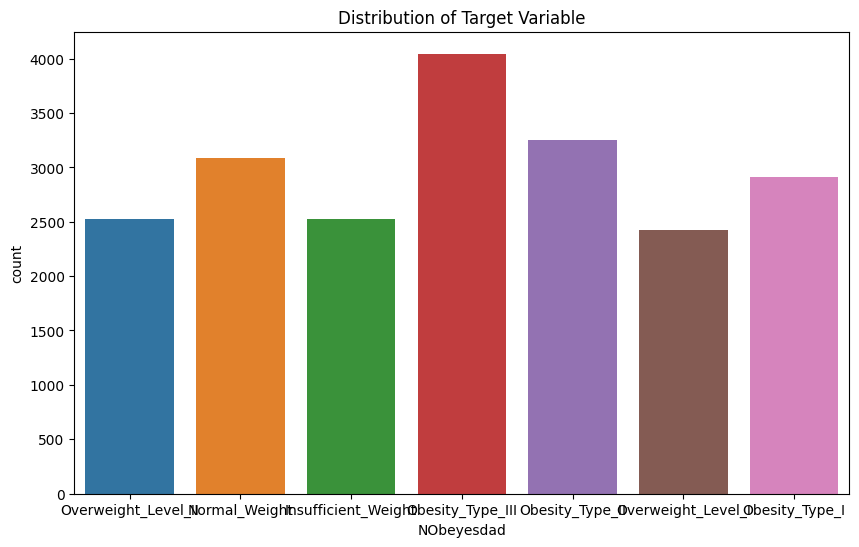

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="NObeyesdad", data=train_data)
plt.title("Distribution of Target Variable")
plt.show()

In [8]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['NObeyesdad'] = label_encoder.fit_transform(train_data['NObeyesdad'])

- In the data preprocessing step, we often encounter categorical variables that need to be converted into a numerical format so that machine learning algorithms can process them.
- The transformed data, which now contains numerical values instead of categorical labels, is reassigned back to the ‘NObeyesdad’ column of the train_data DataFrame.

## Splitting the Dataset

In [9]:
# Split the data into features and target variable
X = train_data.drop(columns=['NObeyesdad', 'id'])
y = train_data['NObeyesdad']

In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## One Hot Encoding 

In [11]:
# Data Preprocessing
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

- By applying pd.get_dummies(), each unique category value in a column is transformed into a new binary column (1s and 0s), where 1 indicates the presence of the category and 0 indicates the absence.

## Fitting the Model

In [12]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=2500)
model.fit(X_train_encoded, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2500)

## Predicting the Validation Dataset

In [13]:
# Predict on the validation set
y_pred = model.predict(X_val_encoded)

## Evaluating the Model

## Accuracy


In [14]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8509152215799615


**Accuracy: 0.8511560693641619**

## F1 Score

In [15]:
# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       524
           1       0.81      0.79      0.80       626
           2       0.79      0.82      0.80       543
           3       0.95      0.97      0.96       657
           4       0.99      1.00      0.99       804
           5       0.72      0.67      0.69       484
           6       0.71      0.66      0.68       514

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



## Confusion Matrix

In [16]:

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)


Confusion Matrix:
[[487  35   1   0   0   1   0]
 [ 66 496   0   0   0  57   7]
 [  2   0 446  27   7   9  52]
 [  0   0  15 638   1   0   3]
 [  0   0   0   1 803   0   0]
 [  2  65  14   0   0 326  77]
 [  0  19  91   5   0  62 337]]


## Confusion Matrix

A **Confusion Matrix** is a performance measurement tool for machine learning classification. It is a table with two dimensions, "Actual" and "Predicted," and allows the model to be assessed on the test data. The matrix is composed of four outcomes:

- **True Positives (TP)**: The cases in which the model correctly predicted the positive class.
- **True Negatives (TN)**: The cases in which the model correctly predicted the negative class.
- **False Positives (FP)**: The cases in which the model incorrectly predicted the positive class (also known as a "Type I error").
- **False Negatives (FN)**: The cases in which the model incorrectly predicted the negative class (also known as a "Type II error").

These outcomes are used to compute various performance metrics, such as accuracy, precision, recall, and the F1 score, which provide insights into the model's predictive power and reliability.
